# Proyek Analisis Data: Nama dataset
- Nama: Jischak Marthinus Tuny
- Email: tunyjischak@gmail.com
- Id Dicoding: Jischak

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda per bulan di tahun 2011-2012?
- Kapan musim dengan jumlah penyewaan sepeda tertinggi di tahun 2011-2012?
- Seberapa besar jumlah penyewaan sepeda berdasarkan kondisi cuaca di tahun 2011?
- Seberapa besar jumlah penyewaan sepeda berdasarkan kondisi cuaca di tahun 2012?
- Kapan hari dengan jumlah penyewaan sepeda tertinggi di Bulan Desember 2012?



## Menyiapkan semua library yang dibutuhkan

In [1]:
from google.colab import files
import pandas as pd
import datetime as dT
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
data_to_load = files.upload()

# Read the CSV file into a Pandas DataFrame
df_bks = pd.read_csv('hour.csv')
df_bks.head()

Saving hour.csv to hour.csv


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [3]:
print("Info Dataset")
df_bks.info()

print("\nMissing value\n", df_bks.isna().sum())

print("\nduplicated value:", df_bks.duplicated().sum())

#cek nilai season diluar dari nilai 1-4
print("\nfilter kolom season")
print(df_bks.loc[ (df_bks["season"] < 1) | (df_bks["season"] > 4) ])

#cek nilai mnth diluar dari nilai 1-12
print("\nfilter kolom mnth")
print(df_bks.loc[ (df_bks["mnth"] < 1) | (df_bks["mnth"] > 12) ])

#cek kolom working day
print("\nfilter kolom working day")
# weekday 0 == Sunday
print(df_bks.loc[ (df_bks["workingday"] == 1) & (df_bks["weekday"] == 0) ])
# weekday 6 == Saturday
print(df_bks.loc[ (df_bks["workingday"] == 1) & (df_bks["weekday"] == 5) ])

print("\nSummary Descriptive Statistic")
df_bks.describe()

Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Missing value
 instant       0
dted

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [4]:
#Mengubah tipe data dteday ke datetime
df_bks["dteday"] = pd.to_datetime(df_bks["dteday"])
# Tampilkan tipe data df setelah transformasi
print("\nTipe data df setelah transformasi:\n", df_bks.dtypes)

#Memastikan kolom cnt merupakan kalkulasi dari jumlah register dan jumlah casual
df_bks["cnt"] = df_bks["casual"] + df_bks["registered"]



Tipe data df setelah transformasi:
 instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
#Melihat korelasi antar variabel
#df_bks.corr()

#Melihat ringkasan deskriptive statistik
df_bks.describe()

#Mengubah numerik season ke season_cat
df_bks["season_cat"] = df_bks["season"].apply(lambda x: "springer" if x == 1 else "summer" if x == 2 else "fall" if x == 3 else "winter")
#Mengubah season_cat ke tipe category
season_cat = pd.CategoricalDtype(["springer", "summer","fall","winter"])
df_bks["season_cat"] = df_bks["season_cat"].astype(season_cat)

#Mengubah weathersit ke tipe kategori
df_bks["weathersit"] = df_bks["weathersit"].astype("category")

# Hapus kolom yang tidak dibutuhkan
columns_not_used = ["instant","yr","mnth","weekday","temp","atemp","hum","windspeed"]
columns_used = [i for i in df_bks.columns if i not in columns_not_used]
df_bks_data = df_bks.drop(columns_not_used, axis=1)

# Tampilkan info dari dataset
print("\n Info dataset")
print(df_bks_data.info())

# Tampilkan 5 baris teratas dari dataset
print("\n 5 baris teratas")
df_bks_data.head()



 Info dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   hr          17379 non-null  int64         
 3   holiday     17379 non-null  int64         
 4   workingday  17379 non-null  int64         
 5   weathersit  17379 non-null  category      
 6   casual      17379 non-null  int64         
 7   registered  17379 non-null  int64         
 8   cnt         17379 non-null  int64         
 9   season_cat  17379 non-null  category      
dtypes: category(2), datetime64[ns](1), int64(7)
memory usage: 1.1 MB
None

 5 baris teratas


,dteday,season,hr,holiday,workingday,weathersit,casual,registered,cnt,season_cat
0,2011-01-01,1,0,0,0,1,3,13,16,springer
1,2011-01-01,1,1,0,0,1,8,32,40,springer
2,2011-01-01,1,2,0,0,1,5,27,32,springer
3,2011-01-01,1,3,0,0,1,3,10,13,springer
4,2011-01-01,1,4,0,0,1,0,1,1,springer


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda per bulan di tahun 2011-2012?


 5 baris teratas
      dteday  season  hr  holiday  workingday weathersit  casual  registered  \
0 2011-01-01       1   0        0           0          1       3          13   
1 2011-01-01       1   1        0           0          1       8          32   
2 2011-01-01       1   2        0           0          1       5          27   
3 2011-01-01       1   3        0           0          1       3          10   
4 2011-01-01       1   4        0           0          1       0           1   

   cnt season_cat  
0   16   springer  
1   40   springer  
2   32   springer  
3   13   springer  
4    1   springer  

 24 baris teratas
              date   count
0     2011-January   38189
1    2011-February   48215
2       2011-March   64045
3       2011-April   94870
4         2011-May  135821
5        2011-June  143512
6        2011-July  141341
7      2011-August  136691
8   2011-September  127418
9     2011-October  123511
10   2011-November  102167
11   2011-December   87323
12    2012-

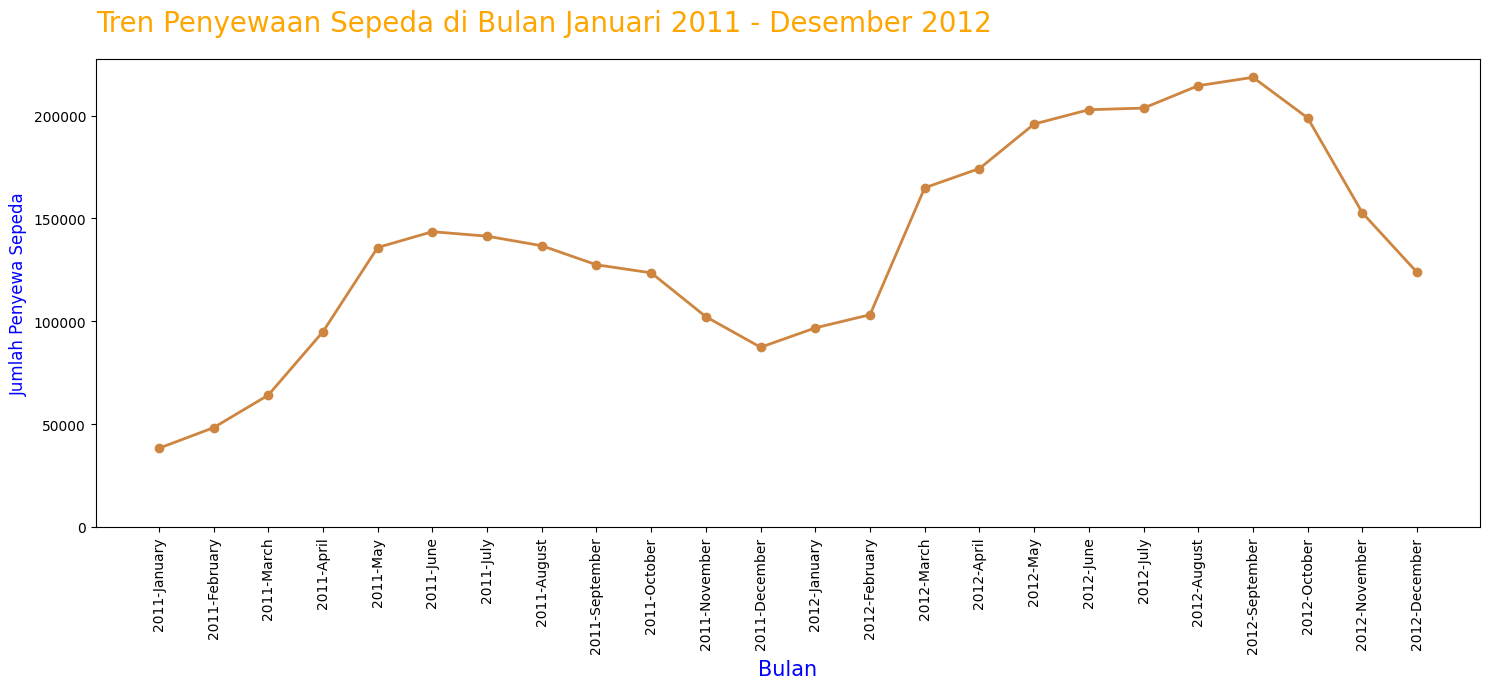

In [6]:
# Tampilkan 5 baris teratas dari dataset
print("\n 5 baris teratas")
print(df_bks_data.head(5))

# resample dataset berdasarkan bulan
df_bks_bulanan = df_bks_data.resample(rule='M', on='dteday').agg({"cnt": "sum"})

# Mengatur dataset dengan indeks "tahun-bulan"
df_bks_bulanan.index = df_bks_bulanan.index.strftime('%Y-%B')

# Reset indeks pada dataset
df_bks_bulanan = df_bks_bulanan.reset_index()

# Mengubah nama kolom dteday dan cnt pada dataset
df_bks_bulanan.rename(columns={
    "dteday": "date",
    "cnt": "count"
}, inplace=True)

# Tampilkan jumlah penyewaan sepeda per bulan di tahun 2011-2012
print("\n 24 baris teratas")
print(df_bks_bulanan.head(24))


# Visualisasi untuk tren jumlah penyewaan sepeda per bulan di tahun 2011-2012
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(df_bks_bulanan["date"], df_bks_bulanan["count"], color='peru', marker='o', linewidth=2)
ax.set_title('Tren Penyewaan Sepeda di Bulan Januari 2011 - Desember 2012', loc='left', pad=20, fontsize=20, color='orange')
ax.set_xlabel('Bulan', fontsize=15, color='blue')
ax.set_ylabel('Jumlah Penyewa Sepeda', fontsize=12, color='blue')
ax.tick_params(axis='x', labelrotation = 90)
plt.ylim(ymin=0)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Seberapa besar jumlah penyewaan sepeda berdasarkan kondisi cuaca di tahun 2011-2012?


 5 baris teratas
      dteday  season  hr  holiday  workingday weathersit  casual  registered  \
0 2011-01-01       1   0        0           0          1       3          13   
1 2011-01-01       1   1        0           0          1       8          32   
2 2011-01-01       1   2        0           0          1       5          27   
3 2011-01-01       1   3        0           0          1       3          10   
4 2011-01-01       1   4        0           0          1       0           1   

   cnt season_cat  
0   16   springer  
1   40   springer  
2   32   springer  
3   13   springer  
4    1   springer  

 Jumlah Penyewa Sepeda per kondisi cuaca
  weathersit    count
0          1  2338173
1          2   795952
2          3   158331
3          4      223


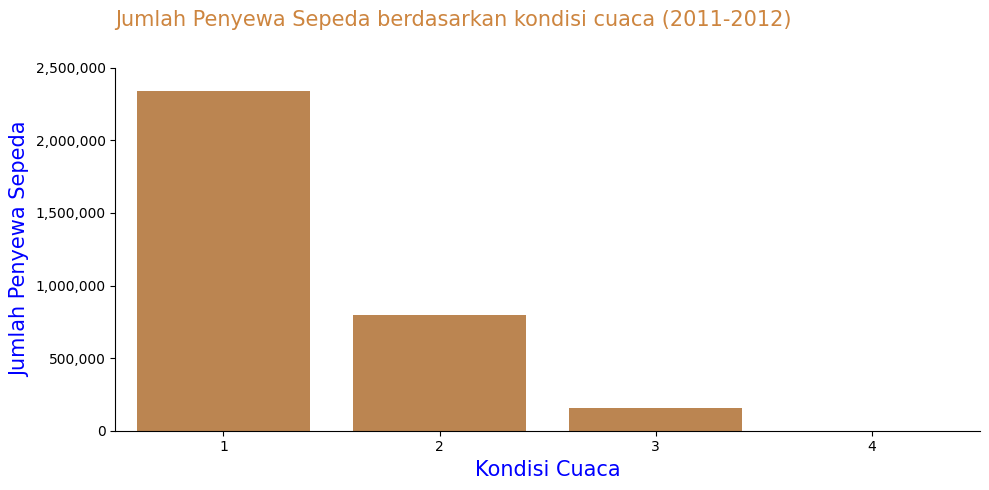

In [7]:
# Tampilkan 5 baris teratas dari dataset
print("\n 5 baris teratas")
print(df_bks_data.head(5))

df_bks_data_percuaca = df_bks_data.groupby("weathersit")["cnt"].sum().reset_index()

df_bks_data_percuaca.rename(columns={
    "cnt": "count"
}, inplace=True)

# Tampilkan Total Jumlah Penyewa Sepeda per kondisi cuaca
print("\n Jumlah Penyewa Sepeda per kondisi cuaca")
print(df_bks_data_percuaca.head())


# Visualisasi bar chart untuk jumlah penyewa per kondisi cuaca di tahun 2011-2012
fig, ax = plt.subplots(figsize=(10, 5))
plots = sns.barplot(data=df_bks_data_percuaca, x="weathersit", y="count", color="peru")
sns.despine()
ax.set_title('Jumlah Penyewa Sepeda berdasarkan kondisi cuaca (2011-2012)', loc='left', pad=30, fontsize=15, color='peru')
ax.set_xlabel('Kondisi Cuaca', fontsize=15, color='blue')
ax.set_ylabel('Jumlah Penyewa Sepeda', fontsize=15, color='blue')
ax.set_ylim(ymin=0)
ticks_loc = ax.get_yticks().tolist()
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Pertanyaan 3: Kapan musim dengan penyewaan sepeda tertinggi di tahun 2011?


 5 baris teratas
      dteday  season  hr  holiday  workingday weathersit  casual  registered  \
0 2011-01-01       1   0        0           0          1       3          13   
1 2011-01-01       1   1        0           0          1       8          32   
2 2011-01-01       1   2        0           0          1       5          27   
3 2011-01-01       1   3        0           0          1       3          10   
4 2011-01-01       1   4        0           0          1       0           1   

   cnt season_cat  
0   16   springer  
1   40   springer  
2   32   springer  
3   13   springer  
4    1   springer  

 Jumlah Penyewa Sepeda per musim di tahun 2011
  season_cat   count
0   springer  150000
1     summer  347316
2       fall  419650
3     winter  326137


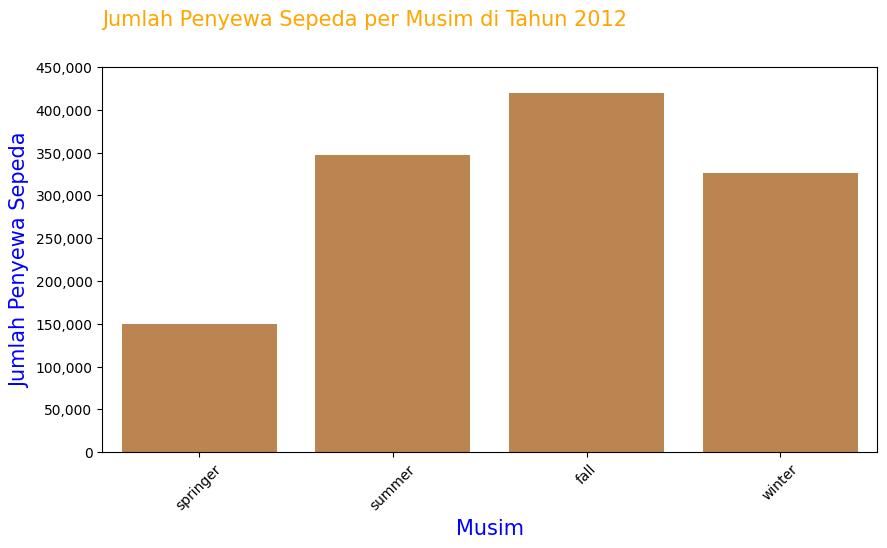

In [8]:
# Tampilkan 5 baris teratas dari dataset
print("\n 5 baris teratas")
print(df_bks_data.head(5))

df_bks_data_2011 = df_bks_data.loc[df_bks_data["dteday"] < "2012-01-01"]

df_bks_data_2011_permusim = df_bks_data_2011.groupby("season_cat")["cnt"].sum().reset_index()

df_bks_data_2011_permusim.rename(columns={
    "cnt": "count"
}, inplace=True)

# Tampilkan Total Jumlah Penyewa Sepeda per musim di tahun 2011
print("\n Jumlah Penyewa Sepeda per musim di tahun 2011")
print(df_bks_data_2011_permusim.head())


# Visualisasi bar chart untuk jumlah penyewa per musim di tahun 2011
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_bks_data_2011_permusim, x="season_cat", y="count", color="peru")
ax.set_title('Jumlah Penyewa Sepeda per Musim di Tahun 2012', loc='left', pad=30, fontsize=15, color='orange')
ax.set_xlabel('Musim', fontsize=15, color='blue')
ax.set_ylabel('Jumlah Penyewa Sepeda', fontsize=15, color='blue')
ticks_loc = ax.get_yticks().tolist()
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 4: Kapan musim dengan penyewaan sepeda tertinggi di tahun 2012?


 5 baris teratas
      dteday  season  hr  holiday  workingday weathersit  casual  registered  \
0 2011-01-01       1   0        0           0          1       3          13   
1 2011-01-01       1   1        0           0          1       8          32   
2 2011-01-01       1   2        0           0          1       5          27   
3 2011-01-01       1   3        0           0          1       3          10   
4 2011-01-01       1   4        0           0          1       0           1   

   cnt season_cat  
0   16   springer  
1   40   springer  
2   32   springer  
3   13   springer  
4    1   springer  

 Jumlah Penyewa Sepeda per musim di tahun 2012
  season_cat   count
0   springer  321348
1     summer  571273
2       fall  641479
3     winter  515476


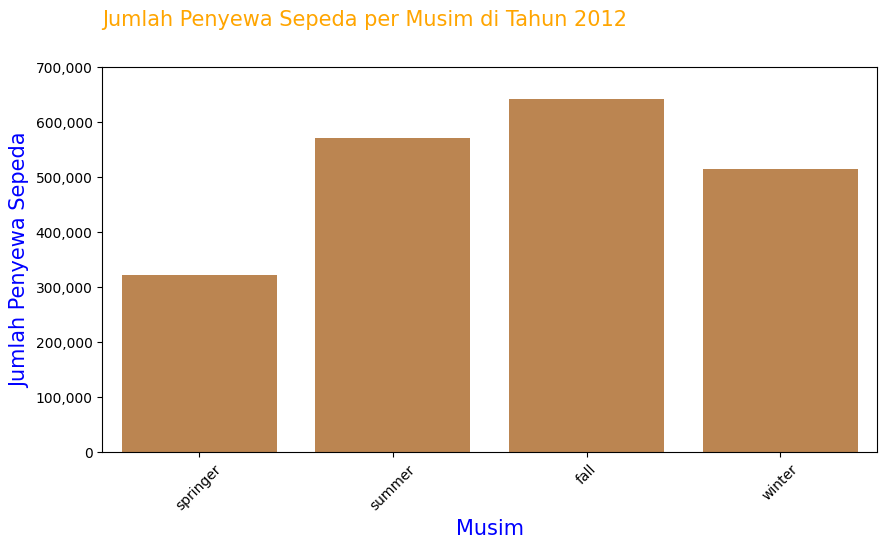

In [9]:
# Tampilkan 5 baris teratas dari dataset
print("\n 5 baris teratas")
print(df_bks_data.head(5))

df_bks_data_2012 = df_bks_data.loc[df_bks_data["dteday"] > "2011-12-31"]

df_bks_data_2012_permusim = df_bks_data_2012.groupby("season_cat")["cnt"].sum().reset_index()

df_bks_data_2012_permusim.rename(columns={
    "cnt": "count"
}, inplace=True)

# Tampilkan Total Jumlah Penyewa Sepeda per musim di tahun 2012
print("\n Jumlah Penyewa Sepeda per musim di tahun 2012")
print(df_bks_data_2012_permusim.head())


# Visualisasi bar chart untuk jumlah penyewa per musim di tahun 2012
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_bks_data_2012_permusim, x="season_cat", y="count", color="peru")
ax.set_title('Jumlah Penyewa Sepeda per Musim di Tahun 2012', loc='left', pad=30, fontsize=15, color='orange')
ax.set_xlabel('Musim', fontsize=15, color='blue')
ax.set_ylabel('Jumlah Penyewa Sepeda', fontsize=15, color='blue')
ticks_loc = ax.get_yticks().tolist()
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 5: Kapan hari dengan rata-rata jumlah penyewaan sepeda tertinggi di bulan Desember 2012?


 5 baris teratas
      dteday  season  hr  holiday  workingday weathersit  casual  registered  \
0 2011-01-01       1   0        0           0          1       3          13   
1 2011-01-01       1   1        0           0          1       8          32   
2 2011-01-01       1   2        0           0          1       5          27   
3 2011-01-01       1   3        0           0          1       3          10   
4 2011-01-01       1   4        0           0          1       0           1   

   cnt season_cat  
0   16   springer  
1   40   springer  
2   32   springer  
3   13   springer  
4    1   springer  
        dteday   cnt        day     month  year
700 2012-12-01  5191   Saturday  December  2012
701 2012-12-02  4649     Sunday  December  2012
702 2012-12-03  6234     Monday  December  2012
703 2012-12-04  6606    Tuesday  December  2012
704 2012-12-05  5729  Wednesday  December  2012
705 2012-12-06  5375   Thursday  December  2012
706 2012-12-07  5008     Friday  December  20

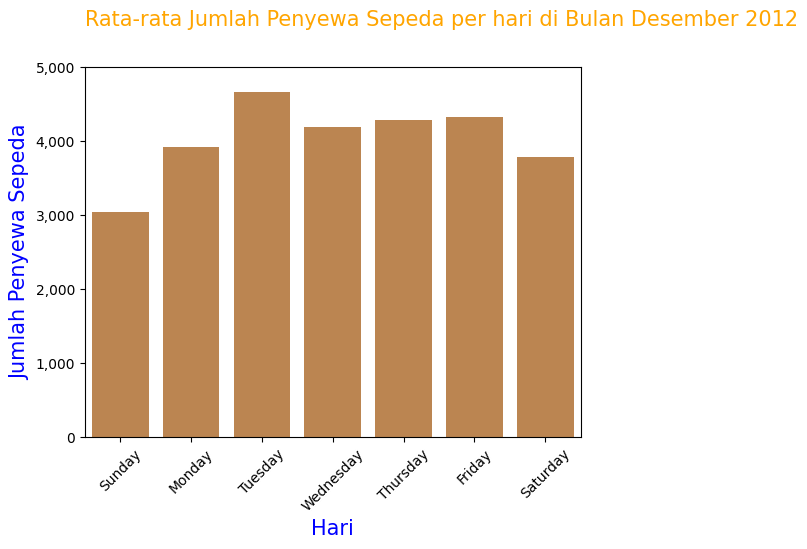

In [14]:
# Tampilkan 5 baris teratas dari dataset
print("\n 5 baris teratas")
print(df_bks_data.head(5))

df_bks_harian = df_bks_data.resample(rule='D', on='dteday')['cnt'].sum().reset_index()

# Mengubah weekday ke day
df_bks_harian["day"] = df_bks_harian.dteday.apply(lambda x: x.strftime('%A'))
day = pd.CategoricalDtype(['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                           'Thursday', 'Friday', 'Saturday'], ordered=True)

df_bks_harian["month"] = df_bks_harian.dteday.apply(lambda x: x.strftime('%B'))
month = pd.CategoricalDtype(['January', 'February', 'March', 'April',
                           'May', 'June', 'July', 'August', 'September',
                           'October', 'November', 'December'], ordered=True)

df_bks_harian["year"] = df_bks_harian.dteday.apply(lambda x: x.strftime('%Y'))
year = pd.CategoricalDtype(['2011', '2012'])

# Mengubah day ke tipe category
df_bks_harian = df_bks_harian.astype({"day":day, "month":month, "year":year})

#filter data jumlah penyewa sepeda untuk bulan Desember 2012
df_bks_harian = df_bks_harian.loc[ (df_bks_harian["dteday"] >= "2012-12-01") & (df_bks_harian["dteday"] <= "2012-12-31") ]

#Cek data penyewa sepeda
print(df_bks_harian.head(31))

df_bks_harian.rename(columns={
    "cnt": "mean"
}, inplace=True)

# Mengelompokkan data berdasarkan hari dan di rata-rata nilainya
df_bks_harian_mean = df_bks_harian.groupby(["day"])["mean"].mean().reset_index()

# Tampilkan jumlah rata-rata penyewaan sepeda per hari
print(df_bks_harian_mean.head(7))


# Visualisasi rata-rata jumlah penyewa per hari di bulan Desember 2012
fig, ax = plt.subplots()
sns.barplot(data=df_bks_harian_mean, x="day", y="mean", color="peru")
ax.set_title('Rata-rata Jumlah Penyewa Sepeda per hari di Bulan Desember 2012', loc='left', pad=30, fontsize=15, color='orange')
ax.set_xlabel('Hari', fontsize=15, color='blue')
ax.set_ylabel('Jumlah Penyewa Sepeda', fontsize=15, color='blue')
ticks_loc = ax.get_yticks().tolist()
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.show()

## Conclusion

- Conclusion pertanyaan 1: Jumlah penyewa sepeda dari tahun 2011 hingga 2012  mangalami kenaikan terkhususnya di bulan September 2012 yang memiliki jumlah penyewan tertinggi yaitu sebanyak 218573. Selain itu, dapat diketahui juga bahwa setiap memasuki akhir tahun (Mulai dari bulan November) terdapat penurunan jumlah penyewa sepeda.
- conclusion pertanyaan 2: Jumlah penyewaan sepeda tertinggi terjadi pada kondisi cuaca adalah cerah/berawan (1). Sedangkan jumlah penyewaan terendah terjadi pada kondisi cuaca hujan Lebat/hujan Es/badai petir/Kabut Salju/Kabut.
- conclution pertanyaan 3: Di tahun 2011 jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (Fall) yaitu sebanyak 419650. Sedangkan di tahun yang sama pada musim dingin (Springer) merupakan jumlah penyewaan sepeda terendah yaitu sebanyak 150000.
- conclution pertanyaan 4: Di tahun 2012 jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (Fall) yaitu sebanyak 641479. Sedangkan di tahun yang sama pada musim dingin (Springer) merupakan jumlah penyewaan sepeda terendah yaitu sebanyak 321348.
- conclusion pertanyaan 5: Pada bulan Desember 2012, rata-rata penyewaan sepeda terdapat pada hari Selasa dengan jumlah rata=rata sebanyak 4669.25.

In [11]:
df_bks_data.to_csv("df_bks_data.csv", index=False)